That is the 3d Project of Computantional Inteligence. We need to make a greph embending of the mnist and cifar dataset to convert them to 2 dimentions and then apply spectral clustering and visualize the different groups.

In [1]:
# Libreries

import scipy.io
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt

#### Mnist

In [2]:
def load_data(mat_data, key_prefix):
    data = []
    labels = []
    for i in range(10):
        data.append(mat_data[f'{key_prefix}{i}'])
        labels.append(np.full(mat_data[f'{key_prefix}{i}'].shape[0], i))
    return np.vstack(data), np.hstack(labels)

mnist = scipy.io.loadmat("C:\\Users\\dimos\\PyProjecks\\Project_SVMs\\mnist_all.mat")

train_data, train_labels = load_data(mnist, 'train')
test_data, test_labels = load_data(mnist, 'test')

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Mini set

In [15]:
def load_data_mini(mat_data, key_prefix, L):
    data = []
    labels = []
    for i in range(10):
        digit_data = mat_data[f'{key_prefix}{i}']
        num_samples = min(L, digit_data.shape[0])
        sampled_data = digit_data[:num_samples]
        sampled_labels = np.full(num_samples, i)
        data.append(sampled_data)
        labels.append(sampled_labels)
    return np.vstack(data), np.hstack(labels)

In [18]:
X_m, y_mini = load_data_mini(mnist, 'train', 500)
print(X_m.shape)
print(y_mini.shape)

(5000, 784)
(5000,)


Normalize the dataset

In [19]:
def normal(X_mini):
    #dedomeno oti einai gray scale eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

X_train = normal(train_data)
X_test = normal(test_data)
X_mini = normal(X_m)

In [4]:
X_embedded = TSNE(random_state = 0, n_components=2,verbose=0).fit_transform(X_train)

w/o normalization time: 3m17sec

with normalization time: 3m 11sec

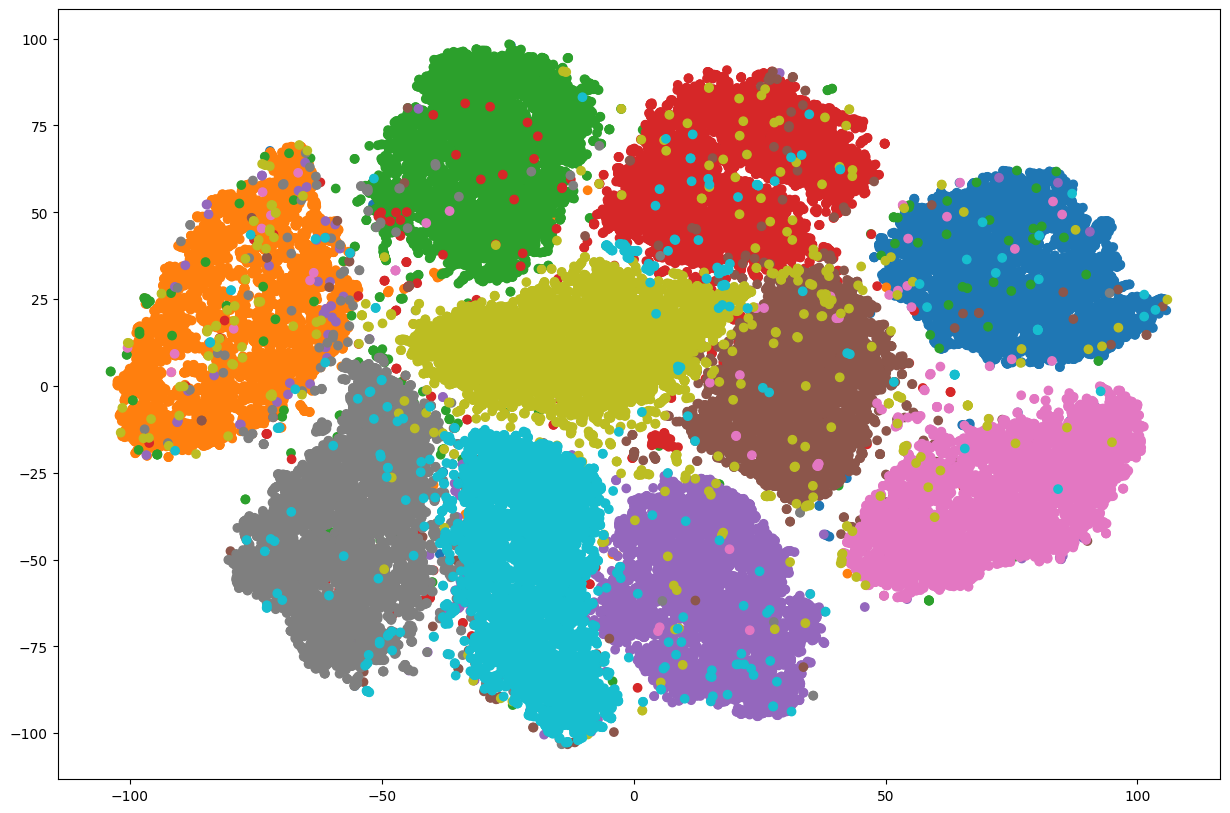

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train_labels, cmap='tab10')
# plt.colorbar()
plt.show()

In [20]:
X_m_embedded = TSNE(random_state = 0, n_components=2,verbose=0).fit_transform(X_mini)
print(X_m_embedded.shape)

(5000, 2)


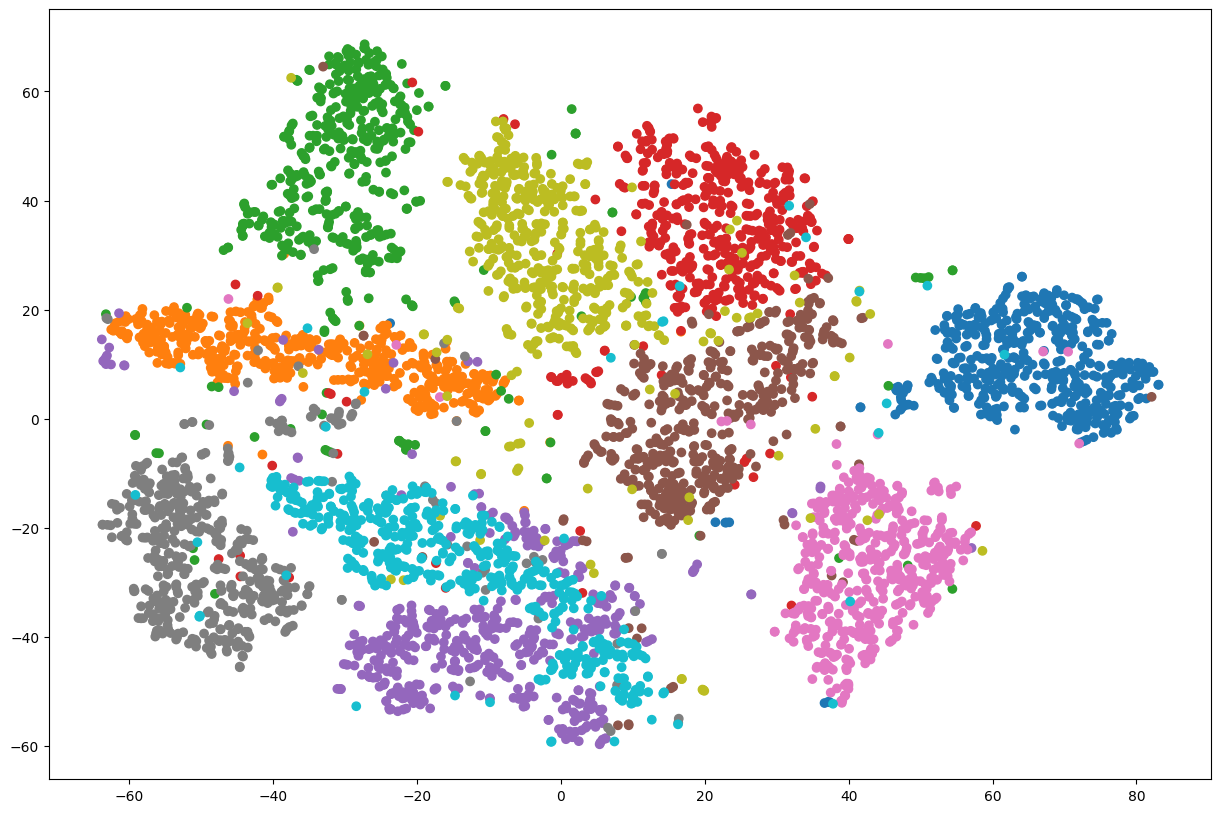

In [22]:
plt.figure(figsize=(15, 10))
plt.scatter(X_m_embedded[:,0], X_m_embedded[:,1], c=y_mini, cmap='tab10')
plt.show()

Spectral Clustering 

In [34]:
clustering = SpectralClustering(n_clusters=10,affinity= 'nearest_neighbors', n_neighbors=500,random_state=42).fit(X_m_embedded) #,assign_labels='discretize'
#,affinity= 'nearest_neighbors'
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clustering.labels_, cmap='rainbow', s=1)

C:\Users\dimos\AppData\Local\Temp\ipykernel_21136\1593912860.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


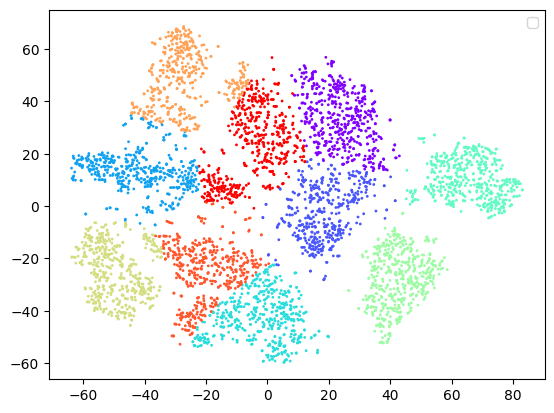

In [35]:
plt.scatter(X_m_embedded[:,0], X_m_embedded[:,1], c=clustering.labels_, cmap='rainbow', s=1)
plt.legend()
plt.show()

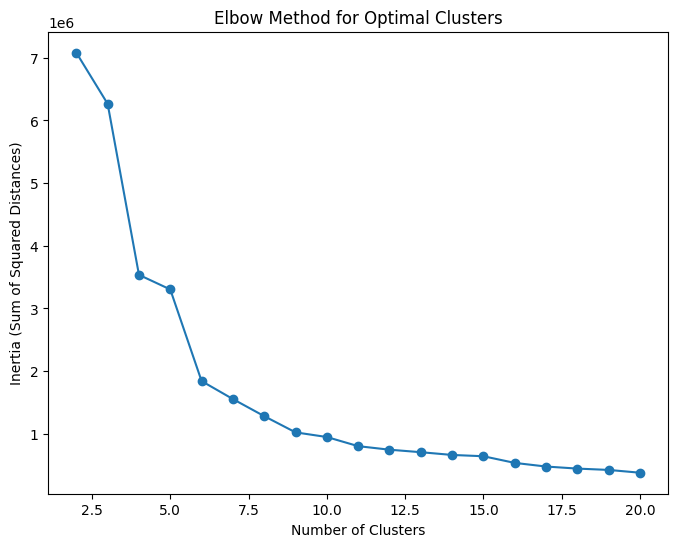

In [31]:
from sklearn.metrics import pairwise_distances
import numpy as np

inertia = []

for n_clusters in range(2, 21):
    clustering = SpectralClustering(
        n_clusters=n_clusters,
        affinity='nearest_neighbors',
        n_neighbors=15,
        random_state=42
    ).fit(X_m_embedded)
    
    cluster_centers = np.array([
        X_m_embedded[clustering.labels_ == i].mean(axis=0)
        for i in range(n_clusters)
    ])
    distances = pairwise_distances(X_m_embedded, cluster_centers, metric='euclidean')
    inertia.append(np.sum(np.min(distances, axis=1)**2))

# Plot the inertia
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()


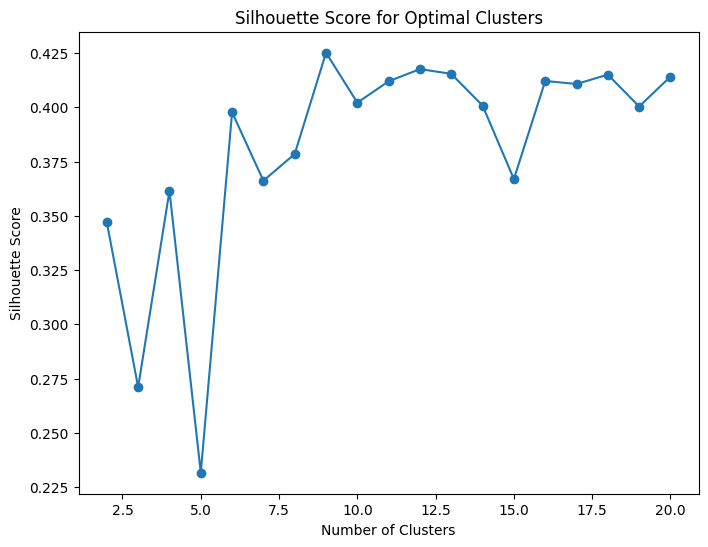

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 21):
    clustering = SpectralClustering(
        n_clusters=n_clusters,
        affinity='nearest_neighbors',
        n_neighbors=15,
        random_state=42
    ).fit(X_m_embedded)
    
    score = silhouette_score(X_m_embedded, clustering.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

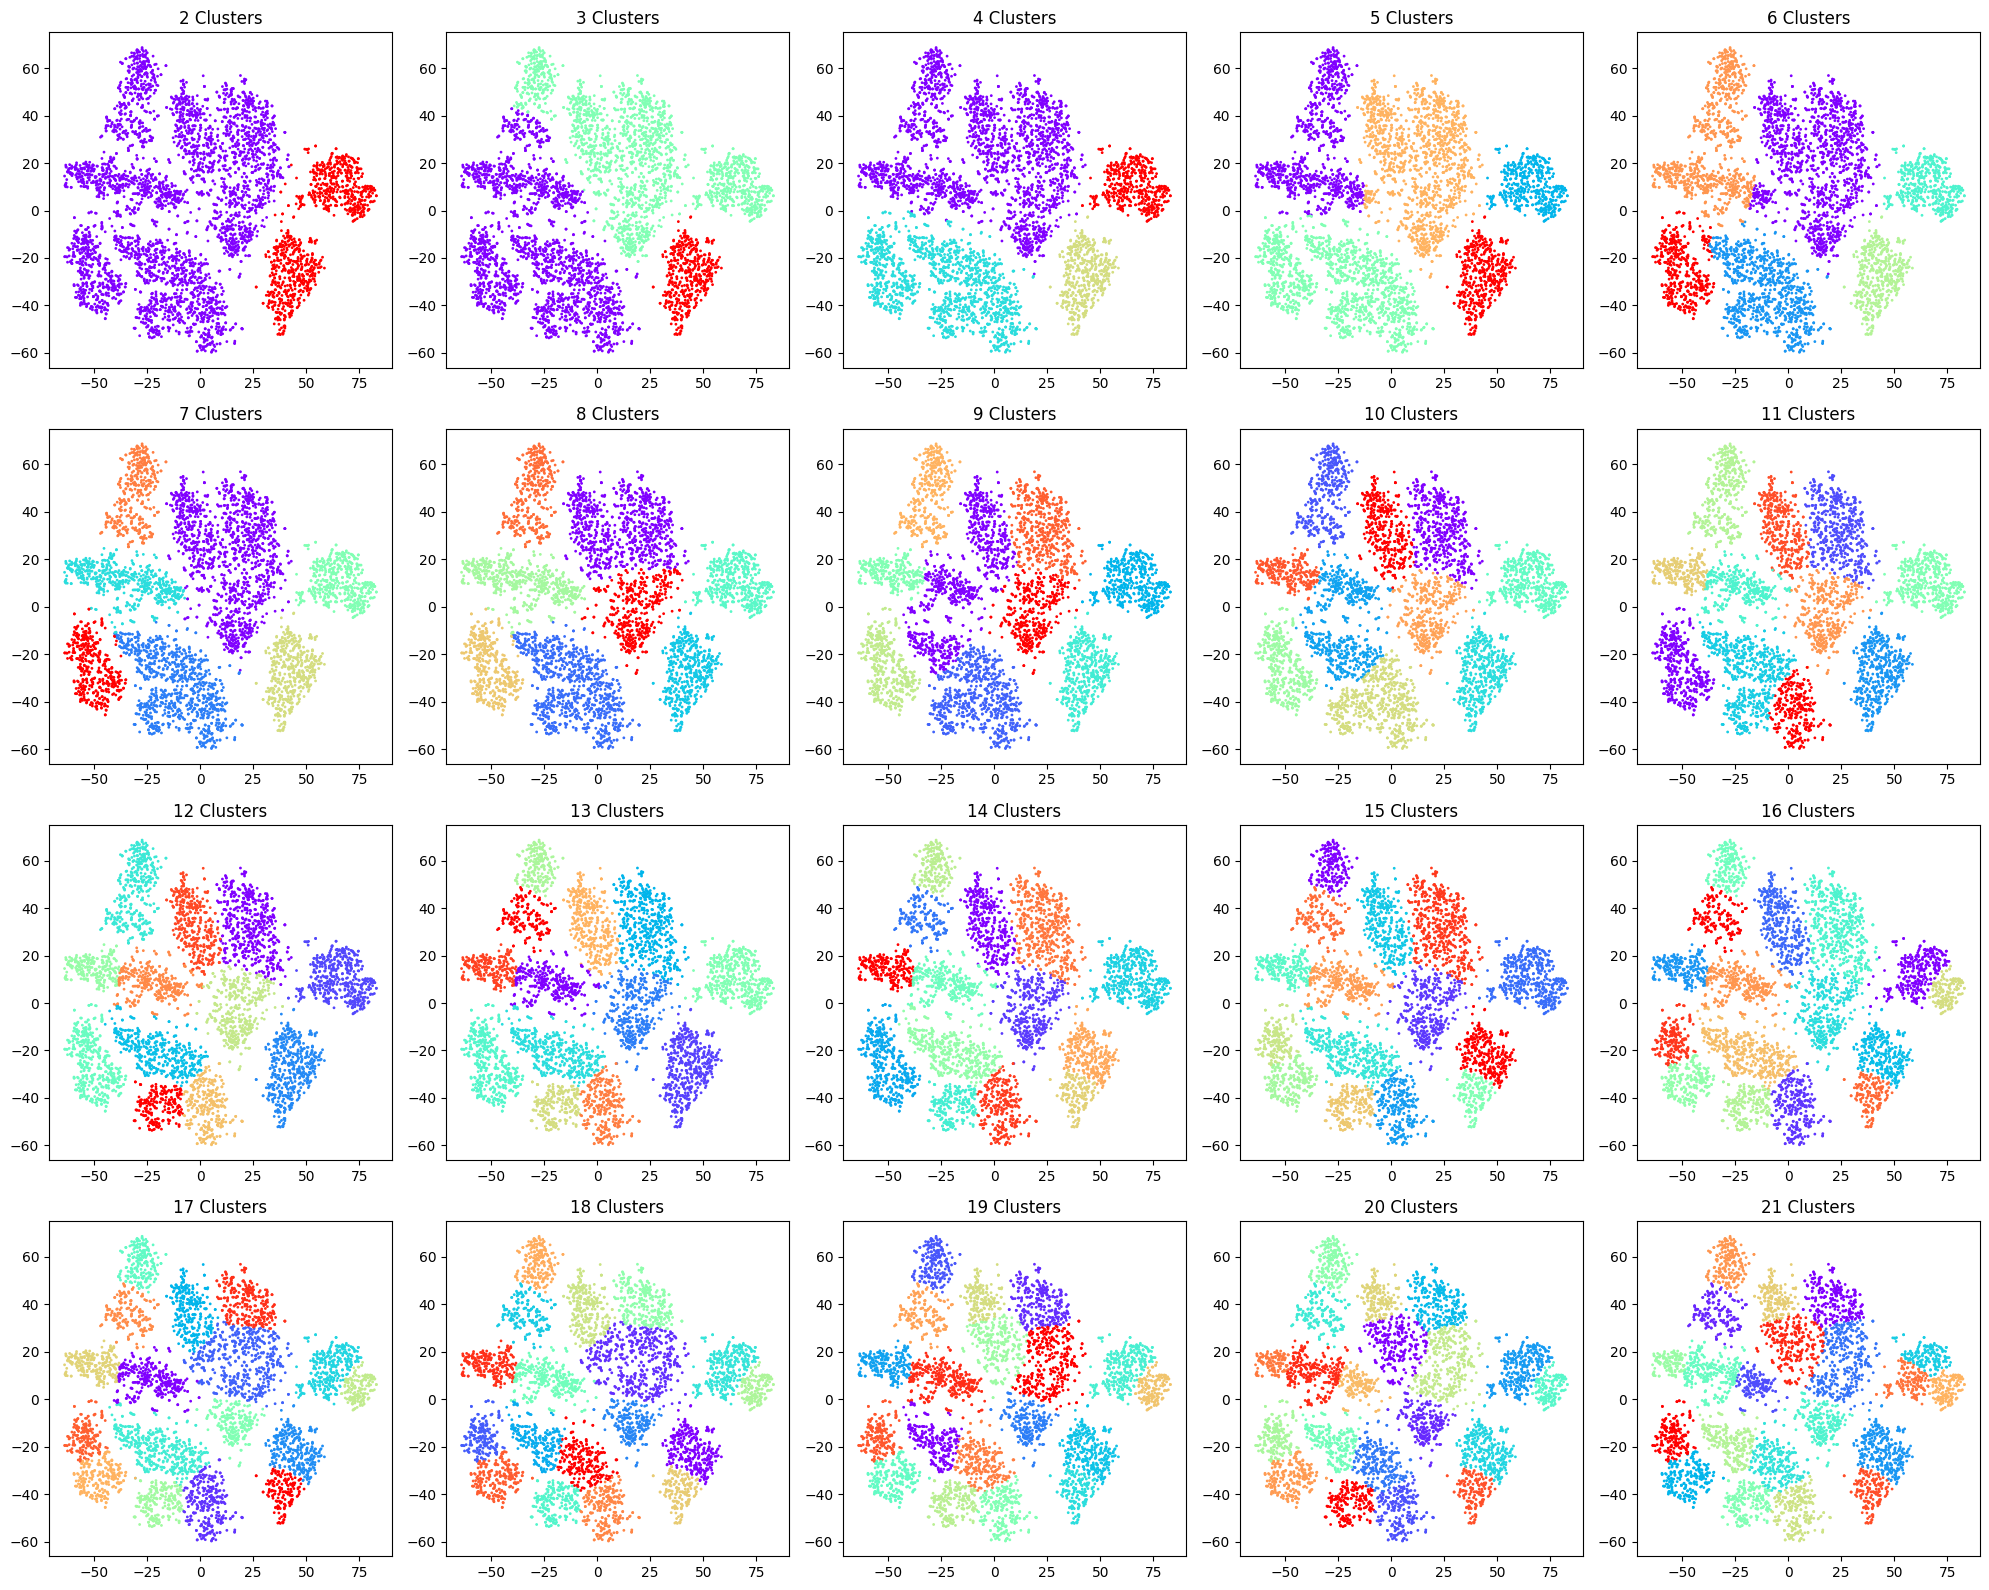

In [29]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4 rows and 5 columns of subplots
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

for i, n_clusters in enumerate(range(2, 22)):  # Iterates through cluster numbers from 2 to 21
    clustering = SpectralClustering(
        n_clusters=n_clusters,
        affinity='nearest_neighbors',
        n_neighbors=100,
        random_state=42
    ).fit(X_m_embedded)
    
    # Plotting the results on the respective subplot
    axes[i].scatter(
        X_m_embedded[:, 0], X_m_embedded[:, 1],
        c=clustering.labels_,
        cmap='rainbow',
        s=1
    )
    axes[i].set_title(f"{n_clusters} Clusters")
    axes[i].axis('on')  # Optional: Turn off axis for cleaner visualization

# Adjust layout for better appearance
plt.tight_layout()
plt.show()